# Xopt PID generator example
Here we will demonstrate how to create a simple PID controller to control the temperature of a room in a simulation.

First we create the simulation:

In [1]:
from xopt.generators.pid.pid import PIDGenerator
from xopt import Evaluator
from xopt import VOCS
from xopt import Xopt
import matplotlib.pyplot as plt
import pandas as pd


# Simulates a cooling room that starts at 95.6 degrees and decreases a certain amount depending on power output.
# Adds some temperature with every step to simulate a hot surrounding environment.
# Clearly not completely accurate to real life, but a good enough simulation.

initial_temp = 95.6
current_temp = initial_temp
time_step = 1  # defines how much "time" passes per step in the simulation

# Creating the simulation within the evaluate function


def evaluate_function(inputs: dict) -> dict:
    global current_temp
    power = inputs["power"]
    if power > 0:
        current_temp -= (0.1 * power * time_step)
    current_temp += time_step
    return {"f": current_temp}


evaluator = Evaluator(function=evaluate_function)

## Next define VOCS, generator, and Xopt object

In [2]:
# create generator and vocs
vocs = VOCS(
    variables={"power": [0, 60]},  # [0,60] specifies the range that power can take
    observables=["f"],
)

generator = PIDGenerator(target_value=80.0,
                         # We make these pid constants negative because we are decreasing the temperature.
                         # If trying to increase a value, all constants should be positive.
                         Kp=-6.0,
                         Ki=-0.2,
                         Kd=0.0,
                         sim_time=1.0,  # defines how much time passes in a step. If not a simulation, set to 0.
                         vocs=vocs)

X = Xopt(evaluator=evaluator, vocs=vocs, generator=generator)

## Now we run the pid controller to reduce the temperature to our target value.

            f      power  xopt_runtime xopt_error
0   95.600000        NaN           NaN        NaN
1   90.600000  60.000000      0.000015      False
2   85.600000  60.000000      0.000010      False
3   82.604000  39.960000      0.000009      False
4   81.353520  22.504800      0.000009      False
5   80.826258  15.272624      0.000011      False
6   80.598827  12.274301      0.000033      False
7   80.495879  11.029486      0.000011      False
8   80.444782  10.510970      0.000009      False
9   80.415447  10.293344      0.000009      False
10  80.395405  10.200427      0.000011      False
11  80.379480  10.159252      0.000009      False
12  80.365520  10.139597      0.000010      False
13  80.352626  10.128943      0.000010      False
14  80.340415  10.122102      0.000007      False
15  80.328723  10.116924      0.000007      False
16  80.317472  10.112514      0.000007      False
17  80.306622  10.108500      0.000006      False
18  80.296149  10.104724      0.000007      False


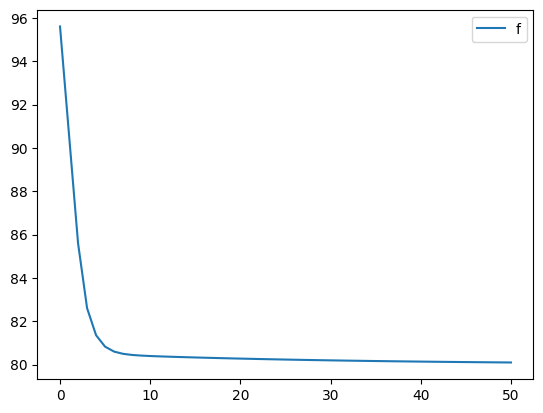

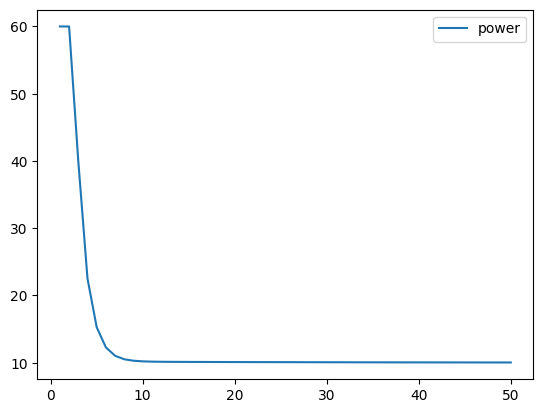

In [3]:
# Run optimization


# we need a start value so that the data set is not empty
# we will initialize the data set with the initial temperature of the system.
X.add_data(pd.DataFrame({"f": [initial_temp]}))

# Run
for i in range(50):
    X.step()
print(X.data)


# plot
X.data.plot(y=X.vocs.observable_names)  # plots temperature with respect to 'time'
X.data.plot(y=X.vocs.variable_names)  # plots power output with respect to 'time'
plt.show()
